# Ejemplos de problemas de Machine Learning

In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

## Ejemplo 1. Reconocimiento de dígitos manuscritos
Se desea reconocer dígitos manuscritos. Para ello se cuenta con una colección de varias imágenes de dígitos conocidos para realizar la construcción de un modelo. Este modelo puede luego utilizarse para clasificar imágenes de dígitos desconocidos.

La base de datos disponible ya viene dividida en un conjunto de imágenes para entrenar el modelo, y otro conjunto para evaluarlo. De esta forma podemos saber cuán bien funciona el modelo creado

In [6]:
mnist_data = np.load('data/mnist.npz')
images_test, images_train, y_train, y_test = [mnist_data[fn] for fn in mnist_data.files]

In [7]:
print('x_train:', images_train.shape)
print('y_train:', y_train.shape)
print('x_test:', images_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [8]:
# Cada imágen de un dígito fue convertida a tamaño 28 x 28 en tonos de gris

(_, IMAGE_WIDTH, IMAGE_HEIGHT) = images_train.shape
print(IMAGE_WIDTH, IMAGE_HEIGHT)

28 28


In [9]:
# Cada valor de la matriz de 28x28 contiene el valor de gris, entre 0 y 255
pd.DataFrame(images_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


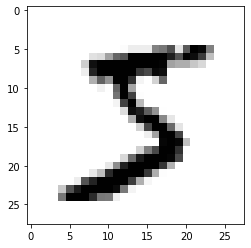

In [10]:
# Este dígito cómo se ve?
plt.imshow(pd.DataFrame(images_train[0]), cmap=plt.cm.gray_r)
plt.show()

In [11]:
# Y se corresponde con el valor???
y_train[0]

5

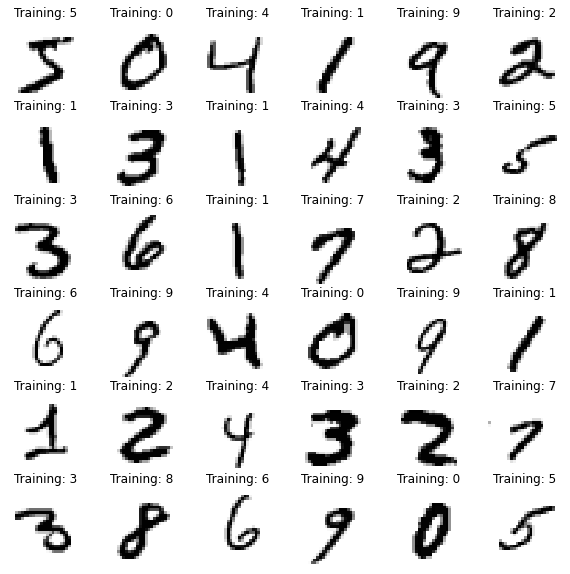

In [12]:
# Mostremos un pedazo de la base de datos
import itertools as it

_, axes = plt.subplots(nrows=6, ncols=6, figsize=(10, 10))
for ax, image, label in zip(it.chain(*axes), images_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

Ideas????
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

Una solución:
- Consideremos el valor de cada pixel como un atributo predictor independiente
- Utilicemos un modelo llamado "regla del vecino mas cercano", o NN, para encontrar el valor del dígito como combinación lineal de los valores de los pixels

In [13]:
num_feats = IMAGE_WIDTH * IMAGE_HEIGHT
print("NumFeats: ", num_feats)
x_train = images_train.reshape((-1, num_feats))
x_test = images_test.reshape((-1, num_feats))
x_train.shape, x_test.shape

NumFeats:  784


((60000, 784), (10000, 784))

In [11]:
# La descripción de cada imagen queda de la siguiente forma
x_train[0], y_train[0]

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

In [14]:
# Entrenemos el modelo
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(x_train, y_train)

SGDClassifier()

In [15]:
# El modelo entrenado puede utilizarse para predecir el dígito de una imágen
model.predict(x_train[0, np.newaxis]), y_train[0]

(array([5], dtype=uint8), 5)

In [16]:
# y otros
predicted = model.predict(x_train[1:10, :])
real = y_train[1:10]
np.hstack([predicted[:, np.newaxis], real[:, np.newaxis]])

array([[0, 0],
       [4, 4],
       [1, 1],
       [9, 9],
       [2, 2],
       [1, 1],
       [3, 3],
       [1, 1],
       [4, 4]], dtype=uint8)

In [18]:
# No hay errores ... claro, son sus propios vecinos!! Probemos con el conjunto de pruebas
predicted = model.predict(x_test[1:10, :])
real = y_test[1:10]
np.hstack([predicted[:, np.newaxis], real[:, np.newaxis]])

array([[2, 2],
       [1, 1],
       [0, 0],
       [4, 4],
       [1, 1],
       [4, 4],
       [9, 9],
       [6, 5],
       [9, 9]], dtype=uint8)

In [21]:
# Evaluemos la calidad del modelo con los datos de entrenamiento
from sklearn import metrics
predicted_train = model.predict(x_train)
metrics.accuracy_score(y_train, predicted_train)

0.8728833333333333

87% para un primer intento, no está mal!

Probemos ahora con los datos de prueba

In [22]:
predicted_test = model.predict(x_test)
metrics.accuracy_score(y_test, predicted_test)

0.8684

Tampoco está nada mal!

Veamos ahora dónde se cometieron los errores

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted_test)
conf_matrix

array([[ 864,    0,   39,    2,    1,   10,   19,    5,   39,    1],
       [   0, 1103,   24,    0,    0,    1,    3,    0,    4,    0],
       [   1,   10,  952,    4,    4,    2,    9,   13,   35,    2],
       [   2,    4,   77,  752,    2,   44,    4,   17,  101,    7],
       [   0,    4,   26,    1,  877,    2,    9,    5,   37,   21],
       [   6,    6,   31,   14,    6,  668,   17,   13,  122,    9],
       [   4,    2,   32,    0,    2,   14,  889,    1,   14,    0],
       [   0,    6,   36,    1,    9,    2,    1,  947,    5,   21],
       [   4,   19,   34,    4,    6,   12,    4,   13,  876,    2],
       [   1,   13,   11,    3,   57,   12,    0,   56,  100,  756]])

<AxesSubplot:>

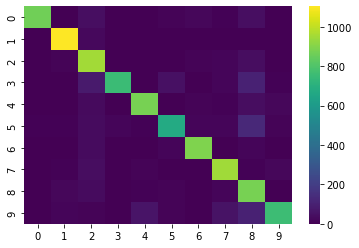

In [28]:
# Un poco más bonito ...
from seaborn import heatmap
heatmap(conf_matrix, cmap='viridis')

### Influencia de la cantidad de objetos usados para entrenar el modelo

In [35]:
count = 100

model2 = SGDClassifier(max_iter=1000, tol=1e-3)
model2.fit(x_train[1:count], y_train[1:count])
predicted_sample = model2.predict(x_test)
metrics.accuracy_score(y_test, predicted_sample)

0.6488

In [37]:
count = 500

model2 = SGDClassifier(max_iter=1000, tol=1e-3)
model2.fit(x_train[1:count], y_train[1:count])
predicted_sample = model2.predict(x_test)
metrics.accuracy_score(y_test, predicted_sample)

0.8018

In [39]:
count = 1000

model2 = SGDClassifier(max_iter=1000, tol=1e-3)
model2.fit(x_train[1:count], y_train[1:count])
predicted_sample = model2.predict(x_test)
metrics.accuracy_score(y_test, predicted_sample)

0.8269

**nota**: Mientras mas objetos para entrenar, mejor queda el modelo

### Influencia del modelo utilizado

In [50]:
class Timer:

    def __init__(self, name=None, active=True):
        self.name = name
        self.active = active
        self.start = None

    def __enter__(self):
        if self.active:
            self.start = time.perf_counter()
        return self

    def __exit__(self, *exc_info):
        if self.active:
            end = time.perf_counter()
            print(f"Time running {self.name}: {(end-self.start)*1000:.2f}ms")

In [54]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=3)
with Timer("model fit"):
    model3.fit(x_train, y_train)
with Timer("model predict"):
    predicted3 = model3.predict(x_test)
metrics.accuracy_score(y_test, predicted3)

Time running model fit: 7.51ms
Time running model predict: 23755.23ms


0.9705

In [55]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=0)
with Timer("model fit"):
    model3.fit(x_train, y_train)
with Timer("model predict"):
    predicted3 = model3.predict(x_test)
metrics.accuracy_score(y_test, predicted3)

Time running model fit: 14944.72ms
Time running model predict: 12.74ms


0.8781

In [58]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=0, max_depth=4)
with Timer("model fit"):
    model3.fit(x_train, y_train)
with Timer("model predict"):
    predicted3 = model3.predict(x_test)
metrics.accuracy_score(y_test, predicted3)

Time running model fit: 2222.07ms
Time running model predict: 6.56ms


0.5957

**notas:**
- La selección del modelo tiene un impacto sustancial en la calidad del resultado
- Algunos modelos demoran mas en el entrenamiento y otros mas en la clasificación. Esto parece ser inversamente proporcional
- Los parámetros del modelo tienen influencia tanto en la calidad del resultado como en el tiempo de ejecución

## Preprocesamiento de los datos
En el problema de los digitos, tenemos mas de 700 atributos predictores ... Esto hace imposible su visualización, y agrega complejidad al modelo resultante

El preprocesamiento de los datos permite su modificación para mejorar la calidad del procesado posterior.

### Reducción de la dimensionalidad usando *principal components analysis (PCA)*.
PCA es una de las técnicas más utilizadas en machine learning, no solo para reducir dimensionalidad, sino para visualización (lo veremos luego), reducción de ruido, entre otras aplicaciones.

Veamos la forma en que funciona. Consideremos estos 200 puntos:

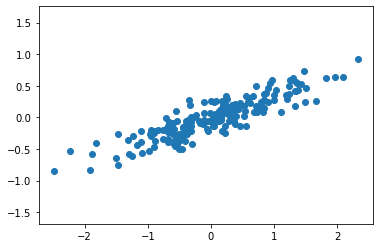

In [59]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Se puede notar que hay una dependencia casi lineal entre los valores de los ejes coordenados. La idea con PCA es buscar cuáles son los ejes de coordenadas que describen de la mejor manera los datos, considerando que la varianza en estos ejes sea la máxima posible.

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Veamos ahora los componentes y la "varianza explicada":

In [64]:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


Para entender que significan estos números dibujémoslos en un gráfico

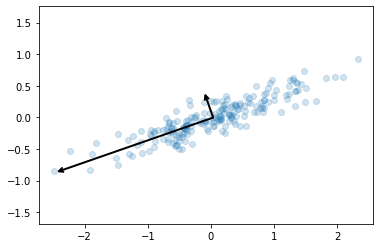

In [66]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Los vectores representan los *ejes principales* de los datos, y el tamaño del vector es un indicador de cuán *importantes* son estos ejes para describir la distribución de los datos. Siguiendo este ejemplo, el vector [-0.94446029, -0.32862557] explica el 76% de la varianza de los datos, mientras que el segundo vector menos del 2%. 

Las proyecciones de todos los puntos en los ejes principales es lo que se denomina *componentes principales*, y permiten una representación más compacta (y usualmente de la misma calidad) que los datos originales

In [68]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Noten que los datos fueron transformados de 2 dimensiones a una, que es la proyección de los datos en el *eje principal* más importante. El efecto de esta transformación puede verse en el siguien

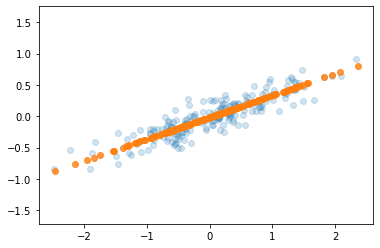

In [70]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

En esta imágen, los puntos claros se corresponden con los puntos originales, mientras que los oscuros son los puntos proyectados en el eje principal. Como puede verse se mantuvo la información más relevante (la del eje con mayor varianza), mientras que se elimina la restante. Noten que la mayor parte de la relación entre los puntos es preservada, aun habiéndose eliminado la mitad de la información

Y ahora de vuelta a los dígitos. Primeros transformemos los datos utilizando StandardScaler, que deja los datos con media 0 y varianza 1. Esto permite reducir las diferencias que puedan haber de escala de los datos originales

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
scaled_train = scaler.transform(x_train)
scaled_train[0, ::10]

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.03059266,
       -0.00832486, -0.00852241, -0.12913326, -0.01408835, -0.03518014,
       -0.2625969 , -0.00528372, -0.16124756, -0.42307969,  0.        ,
       -0.42253575,  1.71565971, -0.01566193,  0.74933951,  2.8127528 ,
       -0.11300485,  1.0888306 , -0.19700703, -0.30001798,  1.12192712,
       -0.05393563,  0.27021375, -0.99948655, -0.00577281, -0.89914825,
       -0.70132425, -0.04720356,  1.64634567, -0.36957331, -0.1273685 ,
       -0.17757569, -0.15382451, -0.3732589 , -0.19833719, -0.02336867,
       -0.70732309, -0.73820569, -0.00477028, -0.84194084, -0.60978718,
       -0.02160143, -0.9194134 , -0.37987428, -0.17786005, -1.00626013,
       -0.16833376, -0.43899543,  0.65022085, -0.03155796, -0.63188648,
        1.44686109,  0.        , -0.60874778, -0.48806277, -0.04049873,
        1.17394853, -0.21262622, -0.14774138, -0.36192512, -0.07003976,
        4.6296095 , -0.61257571, -0.01040248,  3.52099754, -0.25

In [81]:
# Calculemos las dos componentes principales, construyendo un DataFrame con los valores
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(scaled_train)
principal_comps = pca.transform(scaled_train)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2'])
pca_db

,pca1,pca2
0,-0.922172,-4.815008
1,8.708987,-7.754255
2,2.328428,9.432034
3,-6.582164,-3.746183
4,-5.183260,3.133151
...,...,...
59995,-2.039337,-5.119133
59996,0.607833,-6.498556
59997,-3.777210,-3.230570
59998,1.722367,-4.948209


In [83]:
# Adicionemos ahora la columna con la clase correcta
pca_db['class'] = y_train
pca_db

,pca1,pca2,class
0,-0.922172,-4.815008,5
1,8.708987,-7.754255,0
2,2.328428,9.432034,4
3,-6.582164,-3.746183,1
4,-5.183260,3.133151,9
...,...,...,...
59995,-2.039337,-5.119133,8
59996,0.607833,-6.498556,3
59997,-3.777210,-3.230570,5
59998,1.722367,-4.948209,6


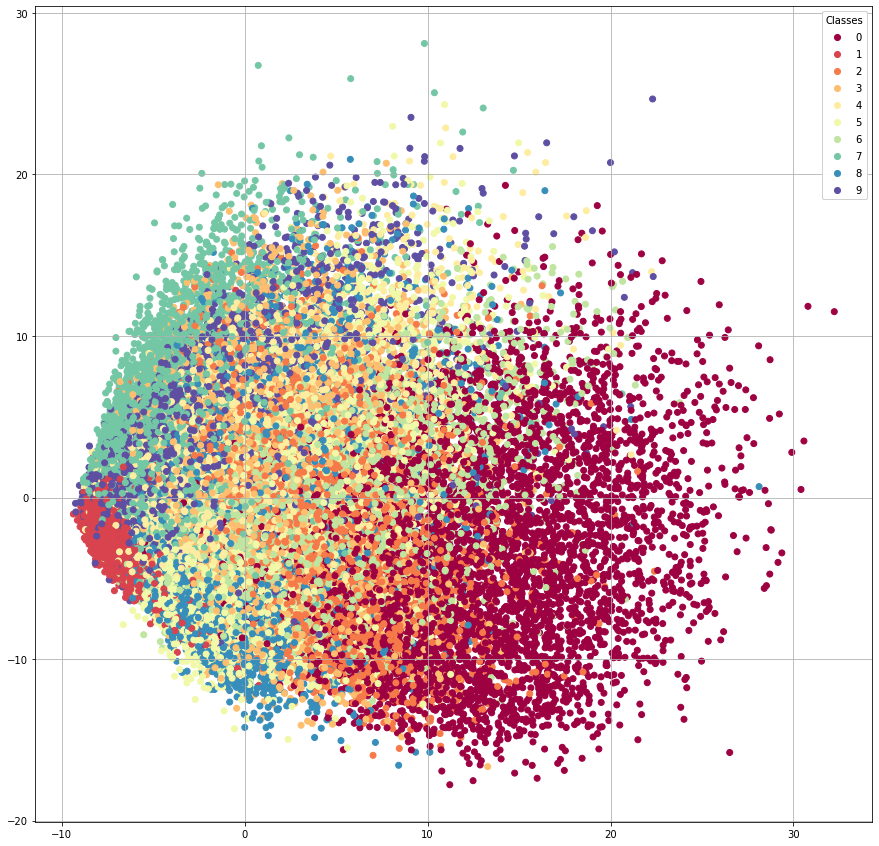

In [84]:
# y visualicemos el resultado
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(pca_db['pca1'], pca_db['pca2'], c=pca_db['class'], cmap="Spectral")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

En esta representación puede verse mucho solapamiento, pero da una idea clara de la distribución de las clases:
- Hay clases más disperas, por lo que tienen mayor variación entre sus imágenes
- La ubicación de cada clase en los ejes es diferente

Limitemos ahora la cantidad de clases a visualizar, tomando además una muestra de los puntos

In [88]:
def plot_digits(digits_to_plot, sample_frac=0.1):
  fig, ax = plt.subplots(figsize=(10, 10))
  to_show = pca_db[pca_db['class'].isin(digits_to_plot)].sample(frac=sample_frac)
  scatter = ax.scatter(to_show['pca1'], to_show['pca2'], c=to_show['class'], cmap="Spectral")
  legend1 = ax.legend(*scatter.legend_elements(),
                      loc="upper right", title="Classes")
  ax.add_artist(legend1)
  ax.grid(True)
  plt.show()

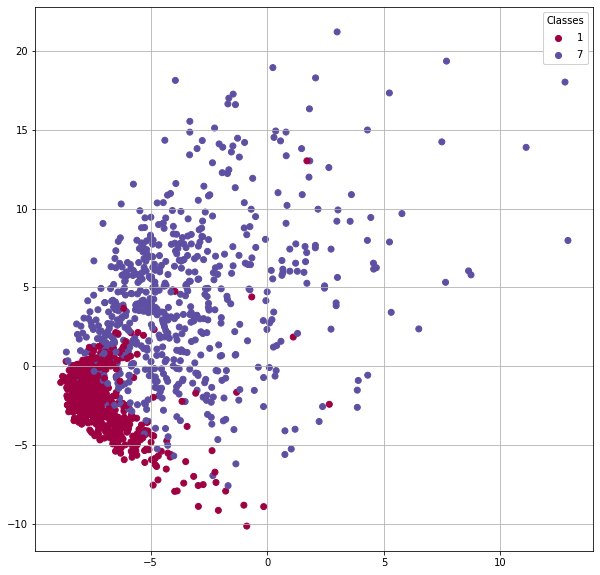

In [90]:
plot_digits({1, 7})

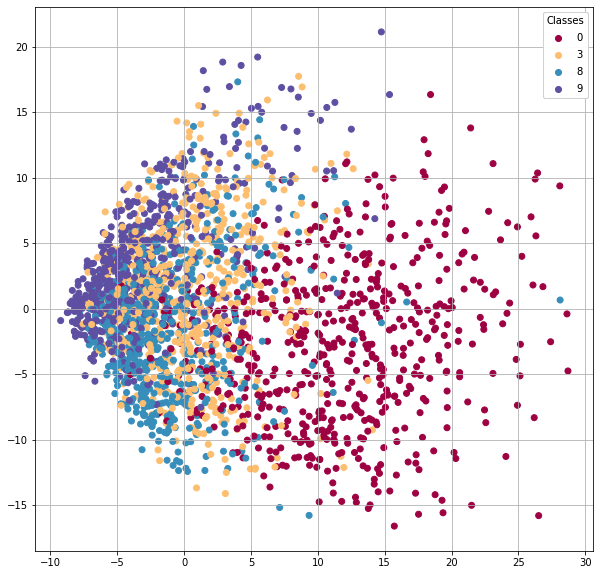

In [91]:
plot_digits({8, 3, 0, 9})

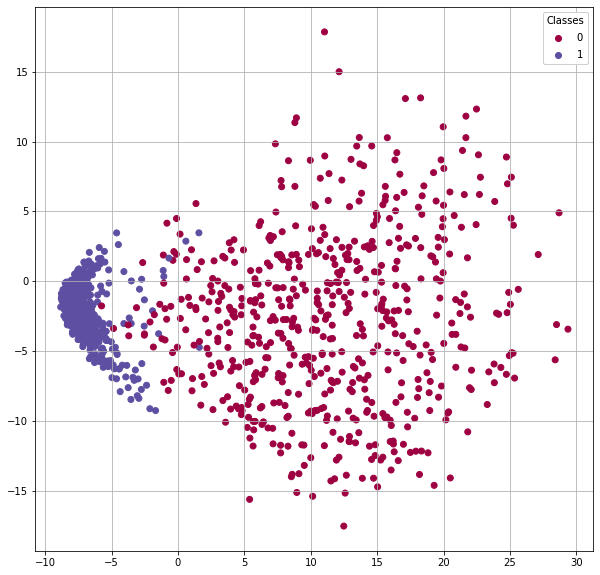

In [92]:
plot_digits({0,1})

Noten que PCA realizó su "magia" sin conocer el dígito asociado a cada número!

Ahora, veamos el impacto que tiene PCA en la calidad de los modelos de clasificación asociados. Para realizar todas las transformaciones necesarias utilizaremos un *pipeline* de operaciones. Esto es necesario porque las transformaciones hay que realizarlas tanto a los datos de entrenamiento como a los datos de prueba

In [95]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), SGDClassifier(max_iter=1000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

0.2987

El resultado es malo, lo que era de esperar dado el gran solapamiento de los datos. Probemos con mas componentes

*nota*: El SGD con todos los atributos tiene 0.873 de eficacia.

In [102]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=20), SGDClassifier(max_iter=1000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

0.8055

Noten que utilizando solamente 20 atributos se puede obtener ya una calidad bastante buena, y se obtiene el resultado en mucho menos tiempo que el original. 

**nota**: El tiempo de entrenamiento de muchos modelos aumenta significativamente cuando aumenta el número de atributos.

## Ejemplo 2. Agrupando clientes para estrategia promocional

El gerente de una cadena de tiendas desea conocer el comportamiento de sus clientes, para poder dirigir campañas publicitarias a subconjuntos de clientes similares.

Los datos disponibles son: género, edad, ingresos anuales y un score entre 0 y 100 que evalúa la magnitud de las compras

In [108]:
df = pd.read_csv("data/Mall_Customers.csv", index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [110]:
# Pongamos nombres mejores a las columnas
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


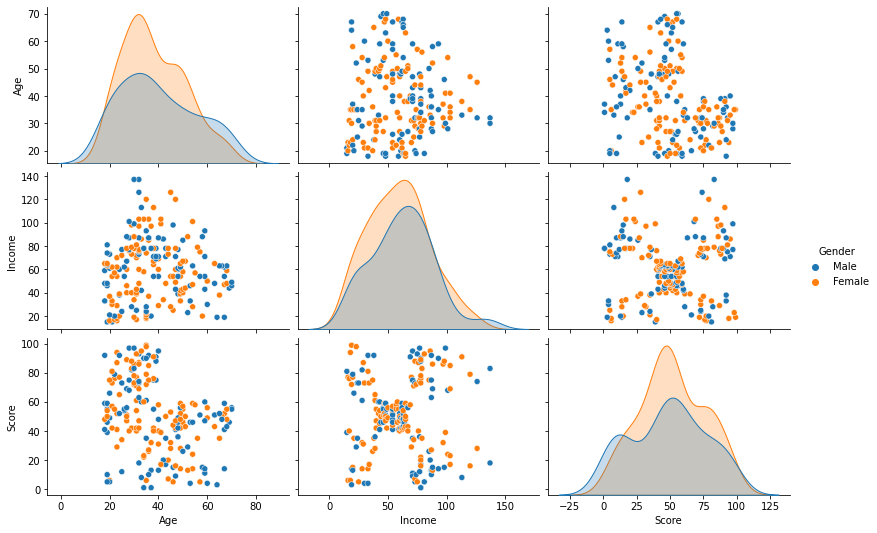

In [114]:
# Entendamos mejor los datos con pairplot
sn.pairplot(df, hue='Gender', aspect=1.5)
plt.show()

En base al análisis de los gráficos anteriore concluimos que el sexo no permite bien dividir a los clientes, por lo que lo eliminamos de la base de datos.

In [116]:
X = df.drop(['Gender'], axis=1)
X.head()

,Age,Income,Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


Utilizaremos el algoritmo de agrupamiento KMeans, que descompone el dataframe en grupos de objetos muy parecidos entre ellos y poco parecidos al resto de los objetos en cada grupo. Como resultado, obtenemos además, un representante de cada grupo, que es el objeto más parecido a los demás.

Este algoritmo recibe como parámetro la cantidad de grupos a generar (k). En este ejemplo, probaremos todos los valores entre 1 y 11 para encontrar el mejor.

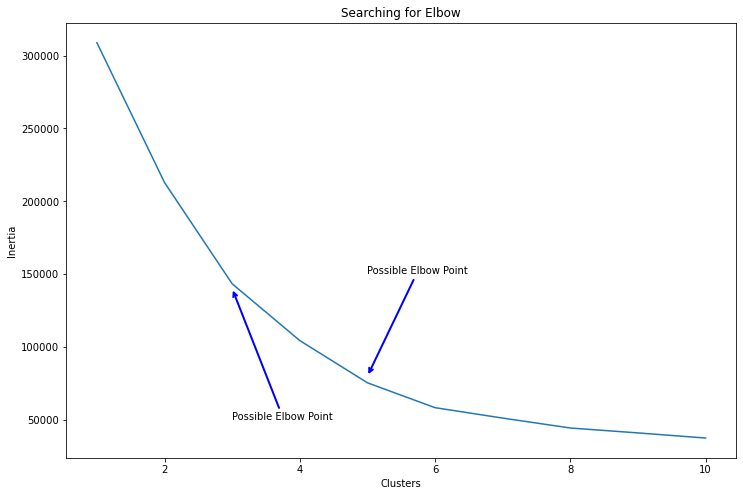

In [122]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sn.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Tenemos dos valores de k candidatos: 3 y 5. Veamos los gráficos resultantes para estos valores.

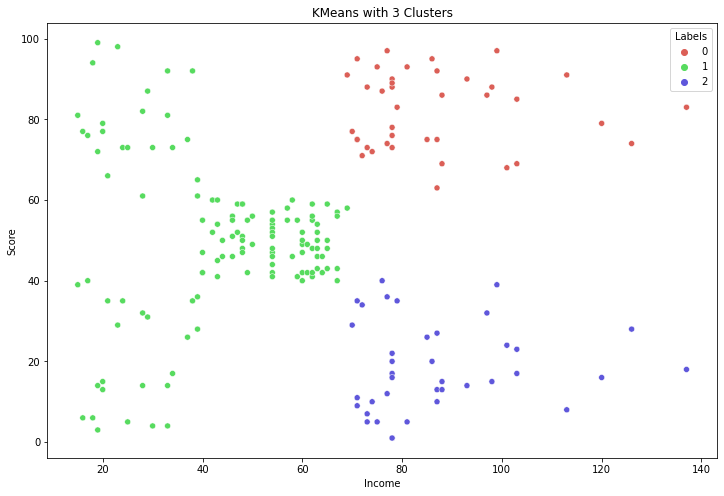

In [126]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

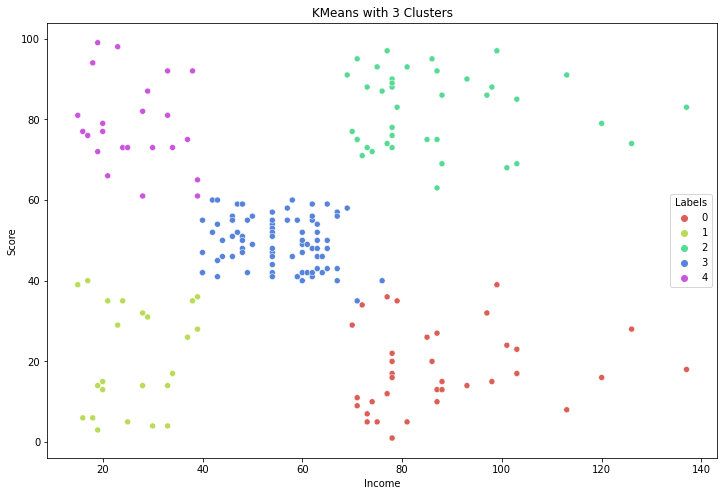

In [128]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 5))
plt.title('KMeans with 3 Clusters')
plt.show()

Al evaluar los gráficos encontramos que con 5 grupos los resultados son mejores que con 3 grupos. 

**Noten** la naturaleza altamente subjetiva de esta evaluación, pues a diferencia del ejemplo 1, aquí no tenemos conocimiento apriori con el que realizar una evaluación objetiva.

Los 5 cluster obtenidos pueden explicarse de la siguiente forma:
- Label 0: altos ingresos y bajos gastos
- Label 1: bajos ingresos y gastos
- Label 2: altos ingresos y gastos
- Label 3: ingresos y gastos medios
- Label 4: bajos ingresos y altos gastos

Como conclusión, el cliente puede notar que hay un segmento con altos ingresos y bajos gastos, al que podría dirigir una estrategia más agresiva de propaganda, y que podría obtener buenos resultados.

Otra conclusión, es que hay un segmento que gasta mucho mas que sus ingresos, lo que es interesante

En todos los casos, también se obtienen las personas en esos grupos

Veamos mas detalles en un swarmplot:

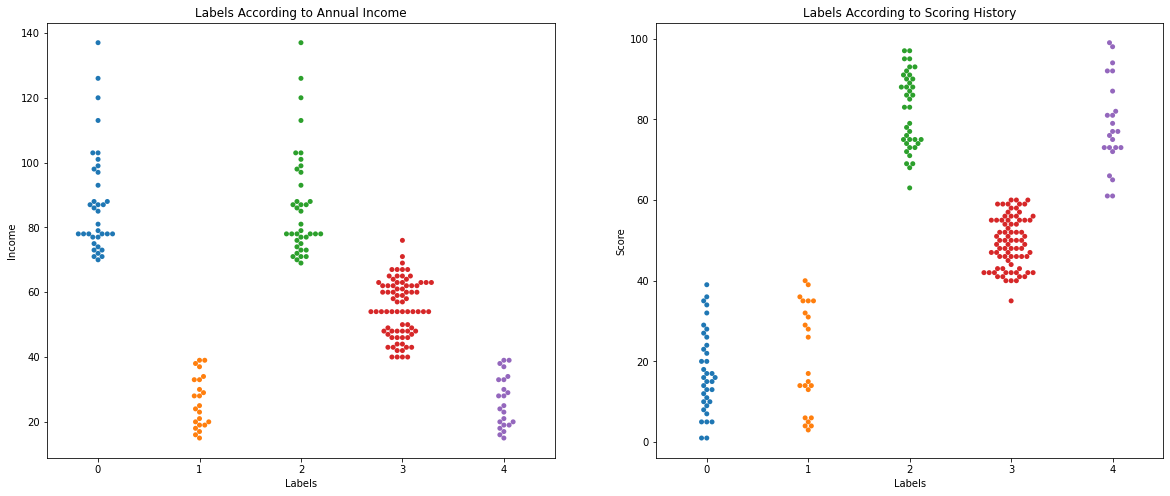

In [130]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sn.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sn.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()